In [2]:
from math import pi
import numpy as np
from matplotlib import pyplot as plt
import random

class Pen:
    def __init__(self, D, H, total_cost):
        self.D = D 
        self.H = H
        self.total_cost = total_cost

    @property 
    def h_cylinder(self):
        h_cylinder = self.H / 1.3 # we assume cone height is 30% of cylinder height
        return h_cylinder
    
    @property 
    def h_cone(self):
        h_cone = self.H - self.h_cylinder
        return h_cone
    
    @property 
    def volume(self):
        #volume = top cylinder_volume + cone_volume
        cylinder_volume = pi * self.D**2 / 4 * self.h_cylinder
        cone_volume = 1/3 * pi * self.D**2 / 4 * self.h_cone 
        volume = cylinder_volume + cone_volume
        return volume
    
    @property 
    def surface(self):
        #surface = top_surface + cone_surface + side_surface
        top_surface = pi * self.D**2 / 4
        cone_surface = pi * self.D/2 * np.sqrt(self.h_cone**2 + self.D**2 / 4)
        side_surface = pi * self.D * self.h_cylinder
        surface = top_surface + cone_surface + side_surface
        return surface
    
    @property 
    def netting_cost(self):
        netting_cost = 0.35 * self.total_cost
        return netting_cost

    @property 
    def struct_cost(self):
        struct_cost = 0.65 * self.total_cost
        return struct_cost

## data from INNOVASEA
pen5200  = Pen(24, 13, 365000)
pen7600  = Pen(27, 16, 405000)
pen14000 = Pen(33, 20, 595000)

## Fit a poly for net_cost on surface

[   49.95917002 38995.13451729]


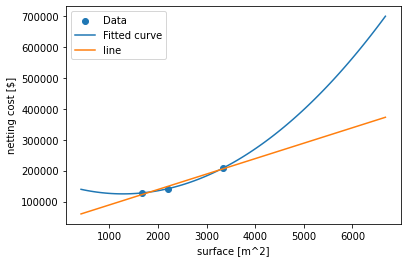

R2 for p_2: 1.0
R2 for p_1: 0.975207539130128


In [3]:
x = np.array([pen5200.surface,      pen7600.surface,      pen14000.surface])
y = np.array([pen5200.netting_cost, pen7600.netting_cost, pen14000.netting_cost])
p_2 = np.poly1d(np.polyfit(x, y, 2))
coeff_1 = np.polyfit(x, y, 1)
print(coeff_1)
p_1 = np.poly1d(coeff_1)
plt.scatter(x, y, label='Data')
x_i = np.linspace(x[0]*.25, x[2]*2, 100)
plt.plot(x_i, p_2(x_i), label='Fitted curve') 
plt.plot(x_i, p_1(x_i), label='line') 
plt.xlabel('surface [m^2]')
plt.ylabel('netting cost [$]')
plt.legend() 
plt.show()

y_mean = np.mean(y) # mean value
SSE = np.sum((y - p_2(x)) ** 2) # sum of squared errors
SST = np.sum((y - y_mean) ** 2) # total sum of squares
R2 = 1 - SSE / SST # coefficient of determination
print("R2 for p_2:", R2)

SSE = np.sum((y - p_1(x)) ** 2) # sum of squared errors
SST = np.sum((y - y_mean) ** 2) # total sum of squares
R2 = 1 - SSE / SST # coefficient of determination
print("R2 for p_1:", R2)

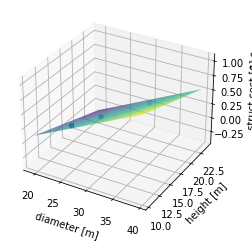

R2 for p_3: 1.0


In [4]:
x1 = np.array([pen5200.D,      pen7600.D,      pen14000.D])
x2 = np.array([pen5200.H,      pen7600.H,      pen14000.H])
y = np.array([pen5200.struct_cost, pen7600.struct_cost, pen14000.struct_cost])

X_augmented = np.hstack((x1.reshape(-1, 1), x2.reshape(-1, 1), np.ones((x1.shape[0], 1))))
coefficients = np.linalg.lstsq(X_augmented, y, rcond=None)[0]

def p_3(x1, x2):
    y_pred = np.dot(np.hstack((x1, x2, [1])), coefficients)
    return y_pred

p_3_vec = np.vectorize(p_3)  # apply the vectorized function to the meshgrid

x1_i = np.linspace(x1[0]*.8, x1[2]*1.2, 100) 
x2_i = np.linspace(x2[0]*.8, x2[2]*1.2, 100) 
X1, X2 = np.meshgrid(x1_i, x2_i) 
Y = p_3_vec(X1, X2)

fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d')                                    
ax.scatter(x1, x2, y, label='Data')
ax.plot_surface(X1, X2, Y, cmap='viridis') 
ax.set_xlabel('diameter [m]') 
ax.set_ylabel('height [m]') 
ax.set_zlabel('struct cost [$]') 
plt.show()

y_mean = np.mean(y) # mean value
SSE = np.sum((y - p_3_vec(x1, x2)) ** 2) # sum of squared errors
SST = np.sum((y - y_mean) ** 2) # total sum of squares
R2 = 1 - SSE / SST # coefficient of determination
print("R2 for p_3:", R2)


[  9250. -99750.]


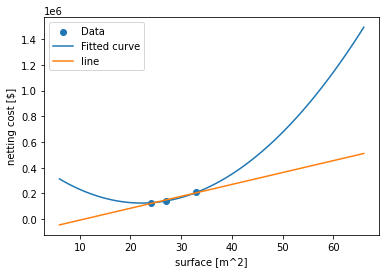

In [6]:
x = np.array([pen5200.D,      pen7600.D,      pen14000.D])
y = np.array([pen5200.netting_cost, pen7600.netting_cost, pen14000.netting_cost])
p_2 = np.poly1d(np.polyfit(x, y, 2))
coeff_1 = np.polyfit(x, y, 1)
print(coeff_1)
p_1 = np.poly1d(coeff_1)
plt.scatter(x, y, label='Data')
x_i = np.linspace(x[0]*.25, x[2]*2, 100)
plt.plot(x_i, p_2(x_i), label='Fitted curve') 
plt.plot(x_i, p_1(x_i), label='line') 
plt.xlabel('surface [m^2]')
plt.ylabel('netting cost [$]')
plt.legend() 
plt.show()

## Fit a linear ploy for net pen geomtery (D based on H)

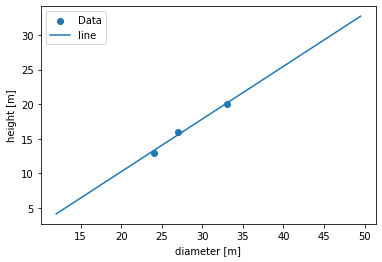

R2 for p_1: 0.9999999999989111


In [7]:
x = np.array([pen5200.D,      pen7600.D,      pen14000.D])
y = np.array([pen5200.H, pen7600.H, pen14000.H])
p_1 = np.poly1d(np.polyfit(x, y, 1))
plt.scatter(x, y, label='Data')
x_i = np.linspace(x[0]*.5, x[2]*1.5, 100)
plt.plot(x_i, p_1(x_i), label='line') 
plt.xlabel('diameter [m]')
plt.ylabel('height [m]')
plt.legend() 
plt.show()

SSE = np.sum((y - p_1(x)) ** 2) # sum of squared errors
SST = np.sum((y - y_mean) ** 2) # total sum of squares
R2 = 1 - SSE / SST # coefficient of determination
print("R2 for p_1:", R2)